In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from DecisionTree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [47]:
# read the dataset
df=pd.read_csv('KDD10.csv').drop(columns='Unnamed: 0')

**Data preprocessing**

In [48]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

In [49]:
def normalisation(df, colName):
    dfMin=df[colName].min()
    dfMax=df[colName].max()
    df[colName]=(df[colName]-dfMin)/(dfMax-dfMin)

def oneHotEncoding(df, colName):
    dummies=pd.get_dummies(df[colName],dtype='int')
    for col in dummies.columns:
        col_name=f"{colName}_{col}"
        df[col_name]=dummies[col]
    df.drop(columns=colName,inplace=True)

In [50]:
normalisation(df, 'duration')
oneHotEncoding(df, 'protocol_type')
oneHotEncoding(df, 'service')
oneHotEncoding(df, 'flag')
normalisation(df, 'src_bytes')
normalisation(df, 'dst_bytes')
oneHotEncoding(df, 'land')
normalisation(df, 'wrong_fragment')
normalisation(df, 'urgent')
normalisation(df, 'hot')
normalisation(df, 'num_failed_logins')
oneHotEncoding(df, 'logged_in')
normalisation(df, 'num_compromised')
normalisation(df, 'root_shell')
normalisation(df, 'su_attempted')
normalisation(df, 'num_root')
normalisation(df, 'num_file_creations')
normalisation(df, 'num_shells')
normalisation(df, 'num_access_files')
oneHotEncoding(df, 'is_guest_login')
normalisation(df, 'count')
normalisation(df, 'srv_count')
normalisation(df, 'serror_rate')
normalisation(df, 'srv_serror_rate')
normalisation(df, 'rerror_rate')
normalisation(df, 'srv_rerror_rate')
normalisation(df, 'same_srv_rate')
normalisation(df, 'diff_srv_rate')
normalisation(df, 'srv_diff_host_rate')
normalisation(df, 'dst_host_count')
normalisation(df, 'dst_host_srv_count')
normalisation(df, 'dst_host_same_srv_rate')
normalisation(df, 'dst_host_diff_srv_rate')
normalisation(df, 'dst_host_same_src_port_rate')
normalisation(df, 'dst_host_srv_diff_host_rate')
normalisation(df, 'dst_host_serror_rate')
normalisation(df, 'dst_host_srv_serror_rate')
normalisation(df, 'dst_host_rerror_rate')
normalisation(df, 'dst_host_srv_rerror_rate')

df = df.copy()

C:\Users\maniv\AppData\Local\Temp\ipykernel_4820\3799565333.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name]=dummies[col]
C:\Users\maniv\AppData\Local\Temp\ipykernel_4820\3799565333.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name]=dummies[col]


In [51]:
df['outcome_num'] = pd.Categorical(df['outcome']).codes
df = df.drop(columns='outcome')

**Data Split**

In [54]:
df = df.sample(frac = 1)
train, test = train_test_split(df, test_size=0.1)

y_train = train['outcome_num'].to_numpy()
X_train = train.drop(columns='outcome_num').to_numpy()
y_test = test['outcome_num'].to_numpy()
X_test = test.drop(columns='outcome_num')
cols = X_test.columns
X_test = X_test.to_numpy()

**Model fitting**

In [55]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

**Prediction**

In [56]:
prediction = clf.predict(X_test)

**Accuracy**

In [131]:
from sklearn.metrics import accuracy_score
print(accuracy_score(prediction,y_test))

0.9997570997712689


**Precision**

In [133]:
from sklearn.metrics import precision_score
print(precision_score(prediction, y_test, average="macro", zero_division=np.nan))

0.9108046424587928


**Recall**

In [134]:
from sklearn.metrics import recall_score
print(recall_score(prediction, y_test, average="macro", zero_division=np.nan))

0.8969457199204931


**F1 Score**

In [135]:
from sklearn.metrics import f1_score
print(f1_score(prediction, y_test, average="macro", zero_division=np.nan))

0.8397408866791324


**Feature_importance**

In [58]:
print("feature importance")
print(clf.feature_importances_)

feature importance
{0: 0.017167375594642053, 1: 0.17771294040745284, 2: 0.24763013518758514, 3: 0.0005774343348078864, 4: 0.00013051454835882572, 5: 0.0026956524341411473, 6: 0.00036706279625772824, 7: 0.0012462165901233678, 8: 0.0003157974411069532, 9: 0.0001250792577901146, 10: 0.0011687639219357582, 11: 0.0009937870924409521, 12: 0.00039248609681852536, 13: 0.00045672266496718343, 14: 0.06689115325290744, 15: 0.04511084506357356, 16: 0.015755381022958155, 17: 0.008805208007363993, 18: 0.008088108885771276, 19: 0.005967727207683531, 20: 0.019790045995758038, 21: 0.008882708825139304, 22: 0.0037809624403283195, 23: 0.07671782438611463, 24: 0.07284431362903715, 25: 0.04213726582738091, 26: 0.02706365766149623, 27: 0.044137511385701295, 28: 0.009008127896120809, 29: 0.0254343158533406, 30: 0.014031497052898656, 31: 0.029273513924589427, 32: 0.013936437426555665, 33: 0.0004694977642347414, 34: 0.00043052359285573823, 35: 0.00042841756933699996, 36: 3.5630694867022e-07, 37: 1.640254270969

In [59]:
result = clf.feature_importances_.items()
data = np.array(list(result))

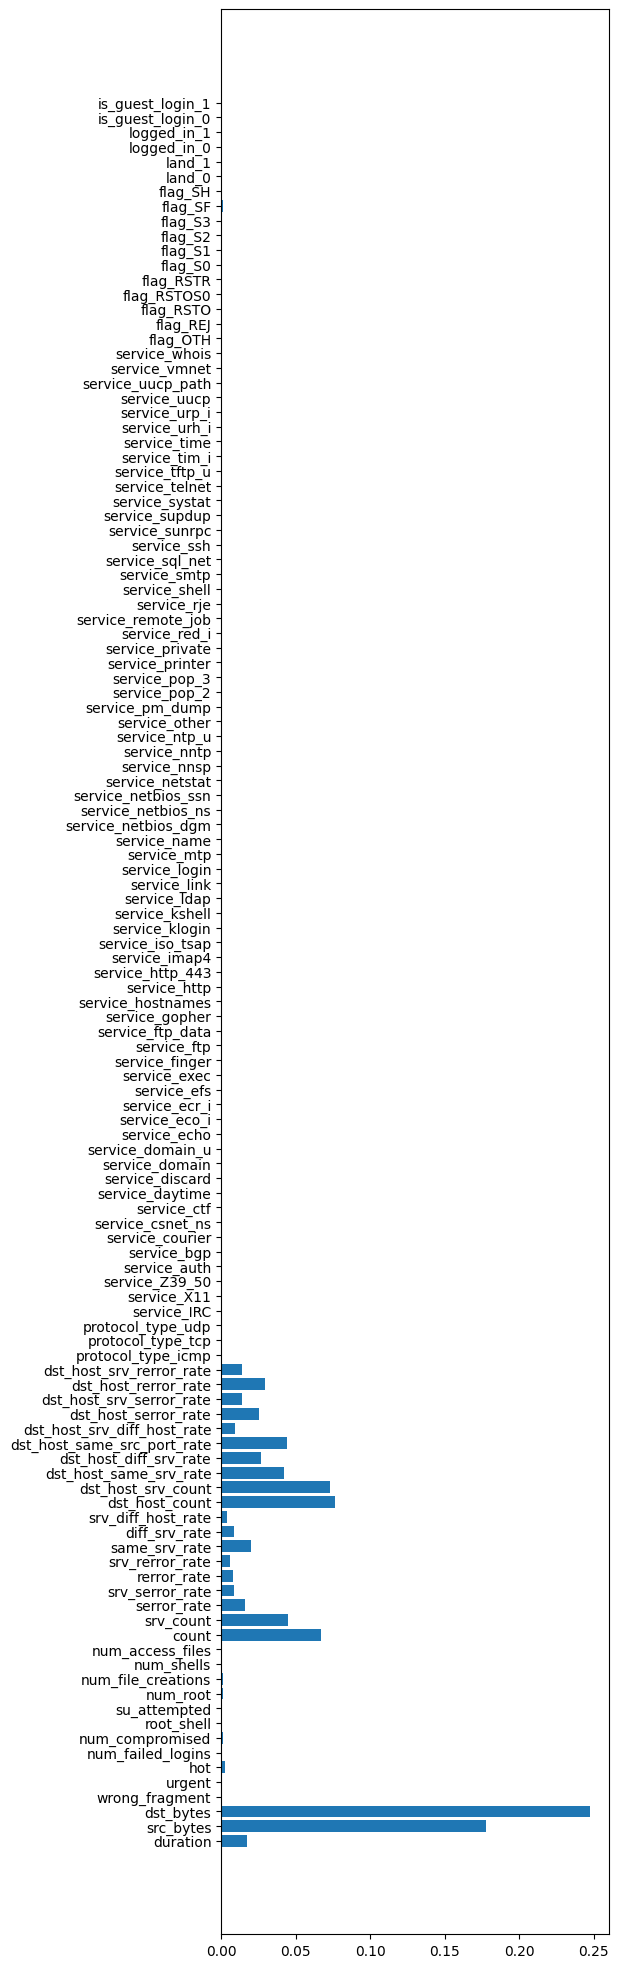

In [60]:
plt.figure(figsize=(5,25))
plt.barh(cols,data[:,1])
plt.show()

**Sensitivity of each features**

In [98]:
def sensitivity_analysis(model, X, y, perturbation):
    sensitivities = {i: [] for i in range(X.shape[1])}
    for sample_idx in range(0, X.shape[0]):
        baseline_prediction = model.predict(X[sample_idx].reshape(1, -1))[0]

        for i in range(X.shape[1]):  # Iterate over each feature
            # Perturb the feature
            perturbed_X = X[sample_idx].copy()
            perturbed_X[i] += perturbation[i]  # Increase the feature

            # Get the prediction after perturbation
            perturbed_prediction = model.predict(perturbed_X.reshape(1, -1))[0]
            sensitivity = abs(perturbed_prediction - baseline_prediction)
            if abs(sensitivity) == abs(np.inf):
                continue
            sensitivities[i].append(sensitivity)
            # Also, check effect of decreasing the feature
            perturbed_X[i] -= 2 * perturbation[i]  # Decrease the feature
            perturbed_prediction_decrease = model.predict(perturbed_X.reshape(1, -1))[0]
            sensitivity_decrease = abs(perturbed_prediction_decrease - baseline_prediction)
            if abs(sensitivity_decrease) == abs(np.inf):
                continue
            sensitivities[i].append(sensitivity_decrease)
    avg_sensitivities = {i: np.mean(sensitivities[i]) for i in sensitivities}
    return avg_sensitivities

**Sensitivity of each feature**

In [99]:
sensitivity = sensitivity_analysis(clf, X_train, y_train, np.mean(X_train,axis=0)*0.1)

In [100]:
print(sensitivity)

{0: 0.016856194361850953, 1: 0.59013727060469, 2: 0.0019421166034663464, 3: 0.0010953272036993721, 4: 0.7405053326675933, 5: 0.09431691924303559, 6: 0.0, 7: 4.498263670223294e-05, 8: 0.0, 9: 0.0, 10: 3.1487845691563055e-05, 11: 4.498243435938266e-06, 12: 0.00044083182265965533, 13: 0.0, 14: 0.01122201805149151, 15: 2.4740561475796982e-05, 16: 1.3494851714071081e-05, 17: 0.0, 18: 0.000719722187235727, 19: 0.0, 20: 1.9117620598448997e-05, 21: 2.3615884268672293e-05, 22: 6.072683271331987e-05, 23: 0.007920317757345665, 24: 0.001066083694317369, 25: 7.422135055868434e-05, 26: 8.996527340446588e-05, 27: 0.0015991255414760535, 28: 9.558767301368816e-05, 29: 7.534591647624017e-05, 30: 3.0363416356659935e-05, 31: 0.0005071769474020395, 32: 0.0, 33: 1.1245709761725902e-05, 34: 0.015015271673856424, 35: 6.747425857035541e-06, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.00433747025509768, 50: 1.6461746507593855, 51: 0.

In [101]:
result = sensitivity.items()
data = np.array(list(result))

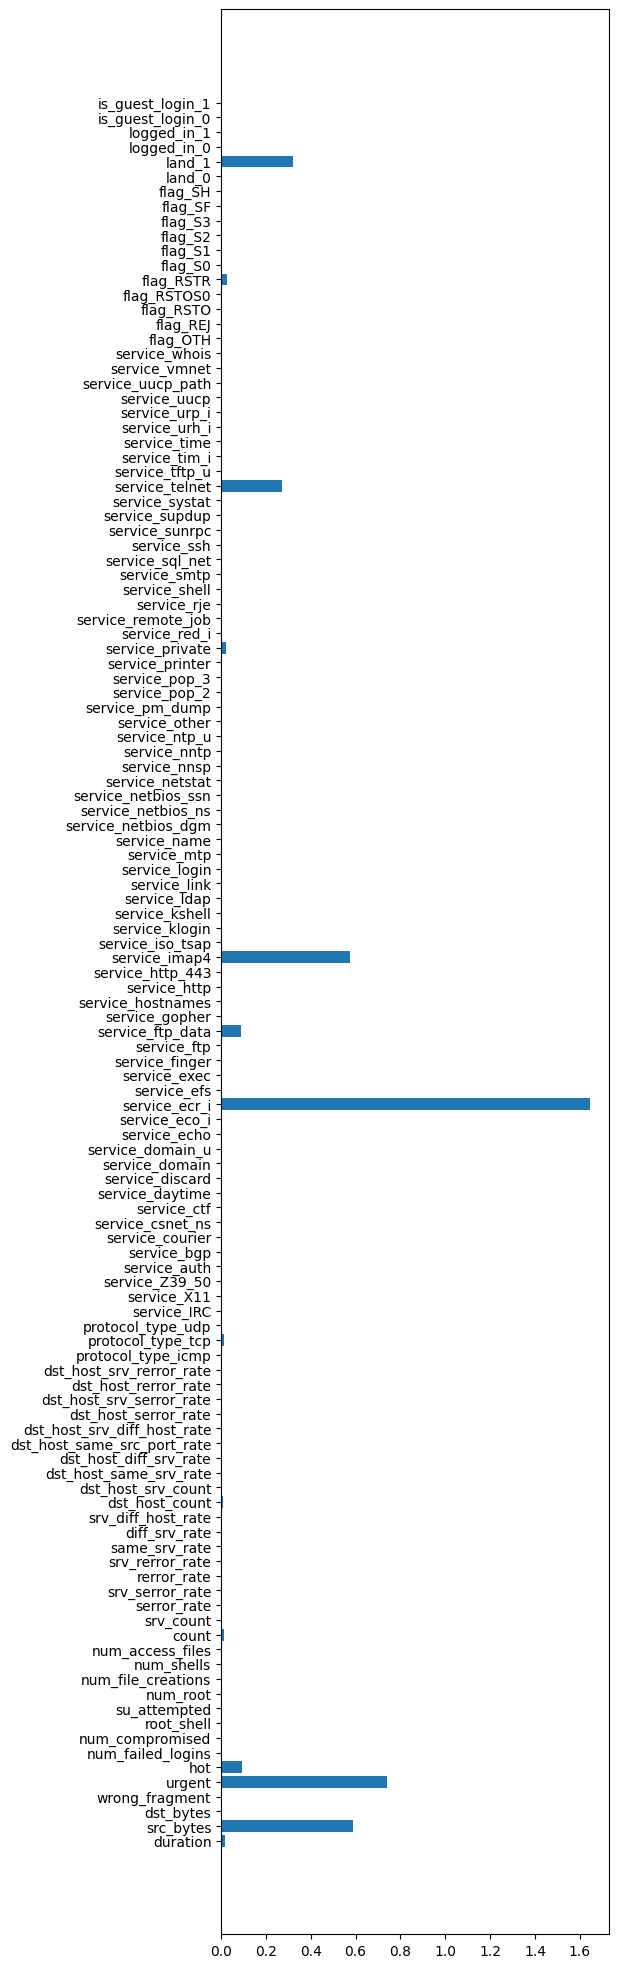

In [102]:
plt.figure(figsize=(5,25))
plt.barh(cols,data[:,1])
plt.show()